# **Financial Risk For Loan Approval**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#models
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# **Reading and Understanding the Data**

In [ ]:
df = pd.read_csv('/content/Loan.csv')

In [ ]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [ ]:
df.isna().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [ ]:
df=df.drop('ApplicationDate',axis=1)

In [ ]:
df.shape

(20000, 35)

In [ ]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


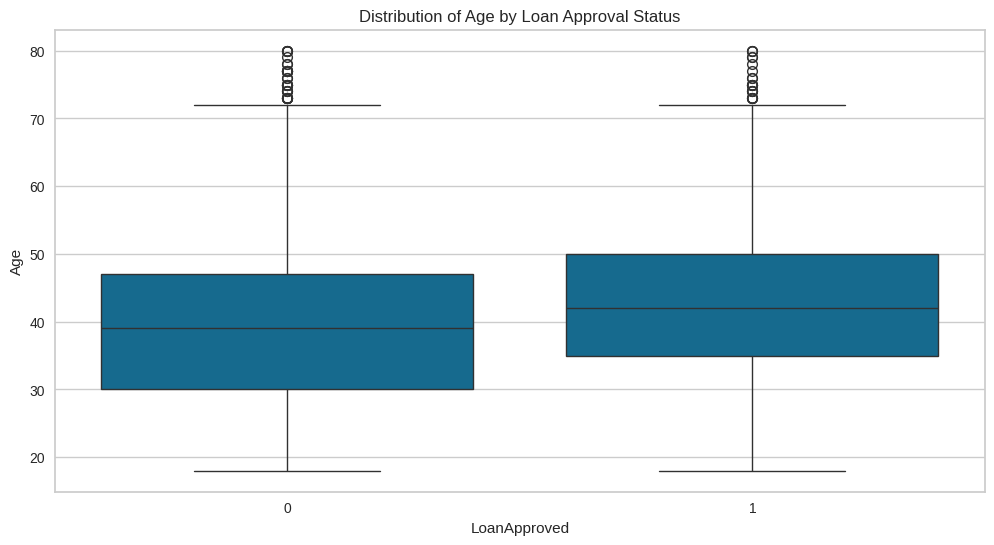

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='LoanApproved', y='Age')
plt.title("Distribution of Age by Loan Approval Status")
plt.show()

The age distribution between those whose loans were approved and those whose loans were not approved is quite similar. Age does not appear to have a very strong effect on loan approval, as the median and spread of age are consistent across both groups

# **Feature Selection**

In [ ]:
# Define target and features
X = df.drop(columns=['LoanApproved'])  # Drop target and unnecessary ID-like column
y = df['LoanApproved']

In [ ]:
# Initial Feature Selection using Correlation
# Select only numeric features for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['LoanApproved'].abs().sort_values(ascending=False)
corr_threshold = 0.1
important_features = correlations[correlations > corr_threshold].index.tolist()

In [ ]:
# Initial Feature Selection using Correlation
# Select only numeric features for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['LoanApproved'].abs().sort_values(ascending=False)
corr_threshold = 0.1
important_features = correlations[correlations > corr_threshold].index.tolist()

# Remove 'LoanApproved' from important_features as it's the target variable and not a feature
important_features.remove('LoanApproved')

# Filter dataset with initially selected features
X_corr_selected = X[important_features]

In [ ]:
# Random Forest Model for Feature Importance
X_train, X_test, y_train, y_test = train_test_split(X_corr_selected, y, test_size=0.2, random_state=42)

# Fit Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances and sort by importance
feature_importances = pd.Series(rf.feature_importances_, index=X_corr_selected.columns).sort_values(ascending=False)


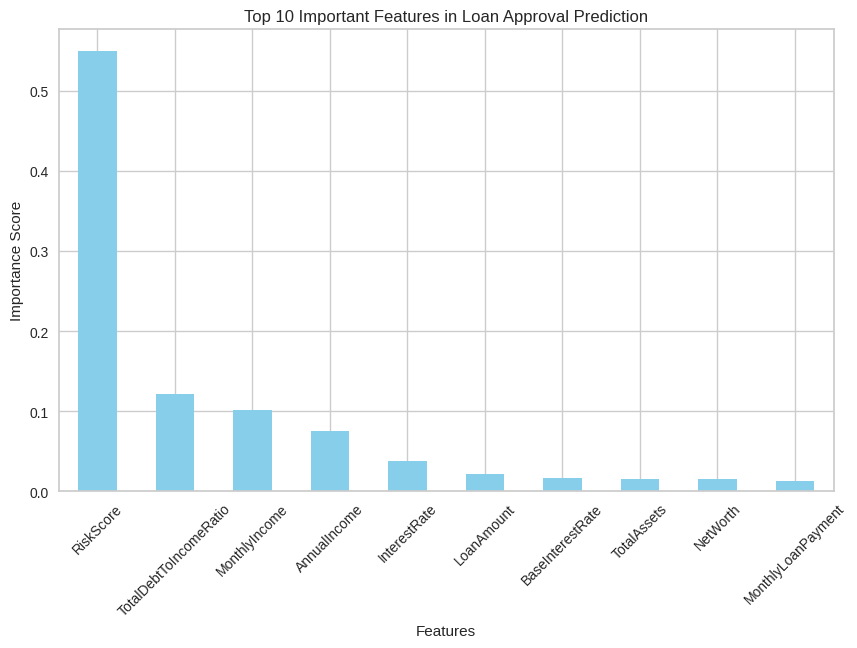

In [ ]:
# Plotting the top 10 important features
top_features = feature_importances.head(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar', color='skyblue')
plt.title("Top 10 Important Features in Loan Approval Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Top selected features from previous analysis
selected_features = ['RiskScore', 'TotalDebtToIncomeRatio', 'MonthlyIncome', 'AnnualIncome',
                     'InterestRate', 'LoanAmount', 'BaseInterestRate', 'TotalAssets',
                     'NetWorth', 'MonthlyLoanPayment']


**EDA for Selected Features**

In [ ]:
# 1. Descriptive Statistics
print("Descriptive Statistics for Selected Features:")
print(df[selected_features].describe())


Descriptive Statistics for Selected Features:
          RiskScore  TotalDebtToIncomeRatio  MonthlyIncome   AnnualIncome  \
count  20000.000000            20000.000000   20000.000000   20000.000000   
mean      50.766780                0.402182    4891.715521   59161.473550   
std        7.778262                0.338924    3296.771598   40350.845168   
min       28.800000                0.016043    1250.000000   15000.000000   
25%       46.000000                0.179693    2629.583333   31679.000000   
50%       52.000000                0.302711    4034.750000   48566.000000   
75%       56.000000                0.509214    6163.000000   74391.000000   
max       84.000000                4.647657   25000.000000  485341.000000   

       InterestRate     LoanAmount  BaseInterestRate   TotalAssets  \
count  20000.000000   20000.000000      20000.000000  2.000000e+04   
mean       0.239110   24882.867800          0.239124  9.696440e+04   
std        0.042205   13427.421217          0.0355

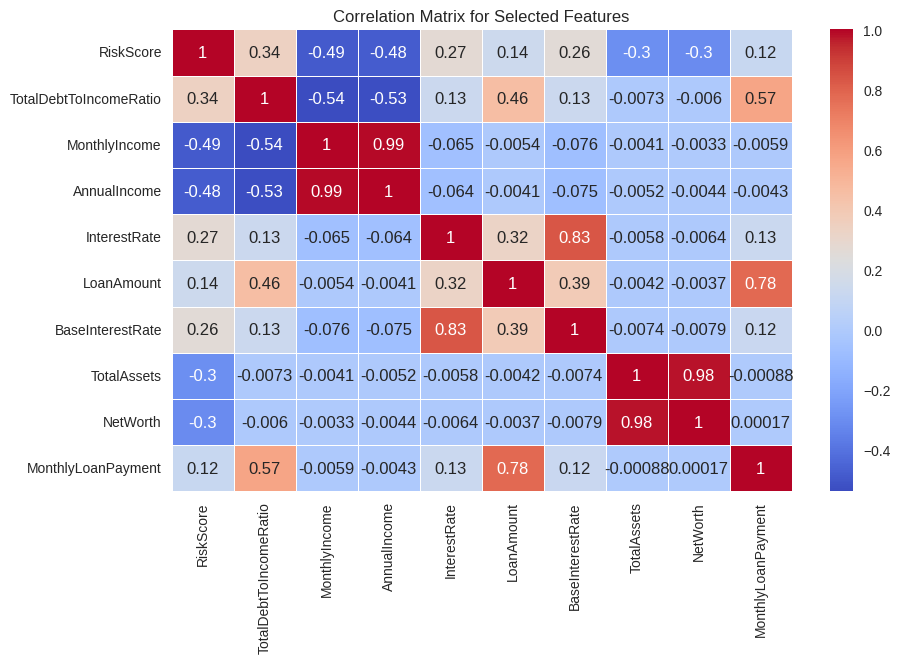

In [ ]:
# 2. Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Selected Features")
plt.show()

Key Observations:

Monthly Income and Annual Income have a **very high positive** correlation (0.99), meaning they move almost identically.

Total Assets and Net Worth also have a **very high correlation** (0.98), indicating strong dependence between these two.

Base Interest Rate and Interest Rate have a high positive correlation (0.83).

Loan Amount and Monthly Loan Payment are strongly positively correlated (0.78).

Total Debt to Income Ratio and Monthly Loan Payment have a moderate positive correlation (0.57).

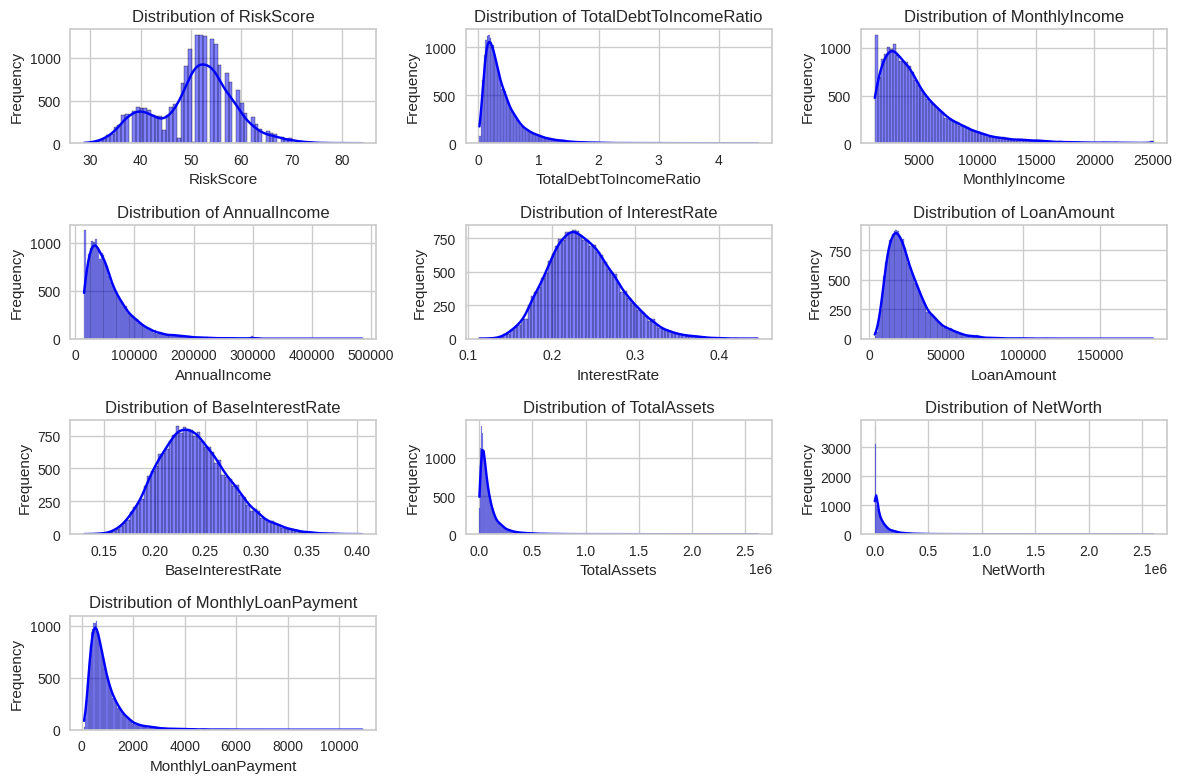

In [ ]:
# 3. Distributions of Selected Features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Many features like income, loan amount, assets, and net worth are right-skewed, indicating that most people fall into lower ranges, with only a few outliers on the higher end.

In contrast, interest rate and base interest rate show more normal distributions, indicating more uniformity around the average values. These insights could help in identifying key trends and outliers for the project.

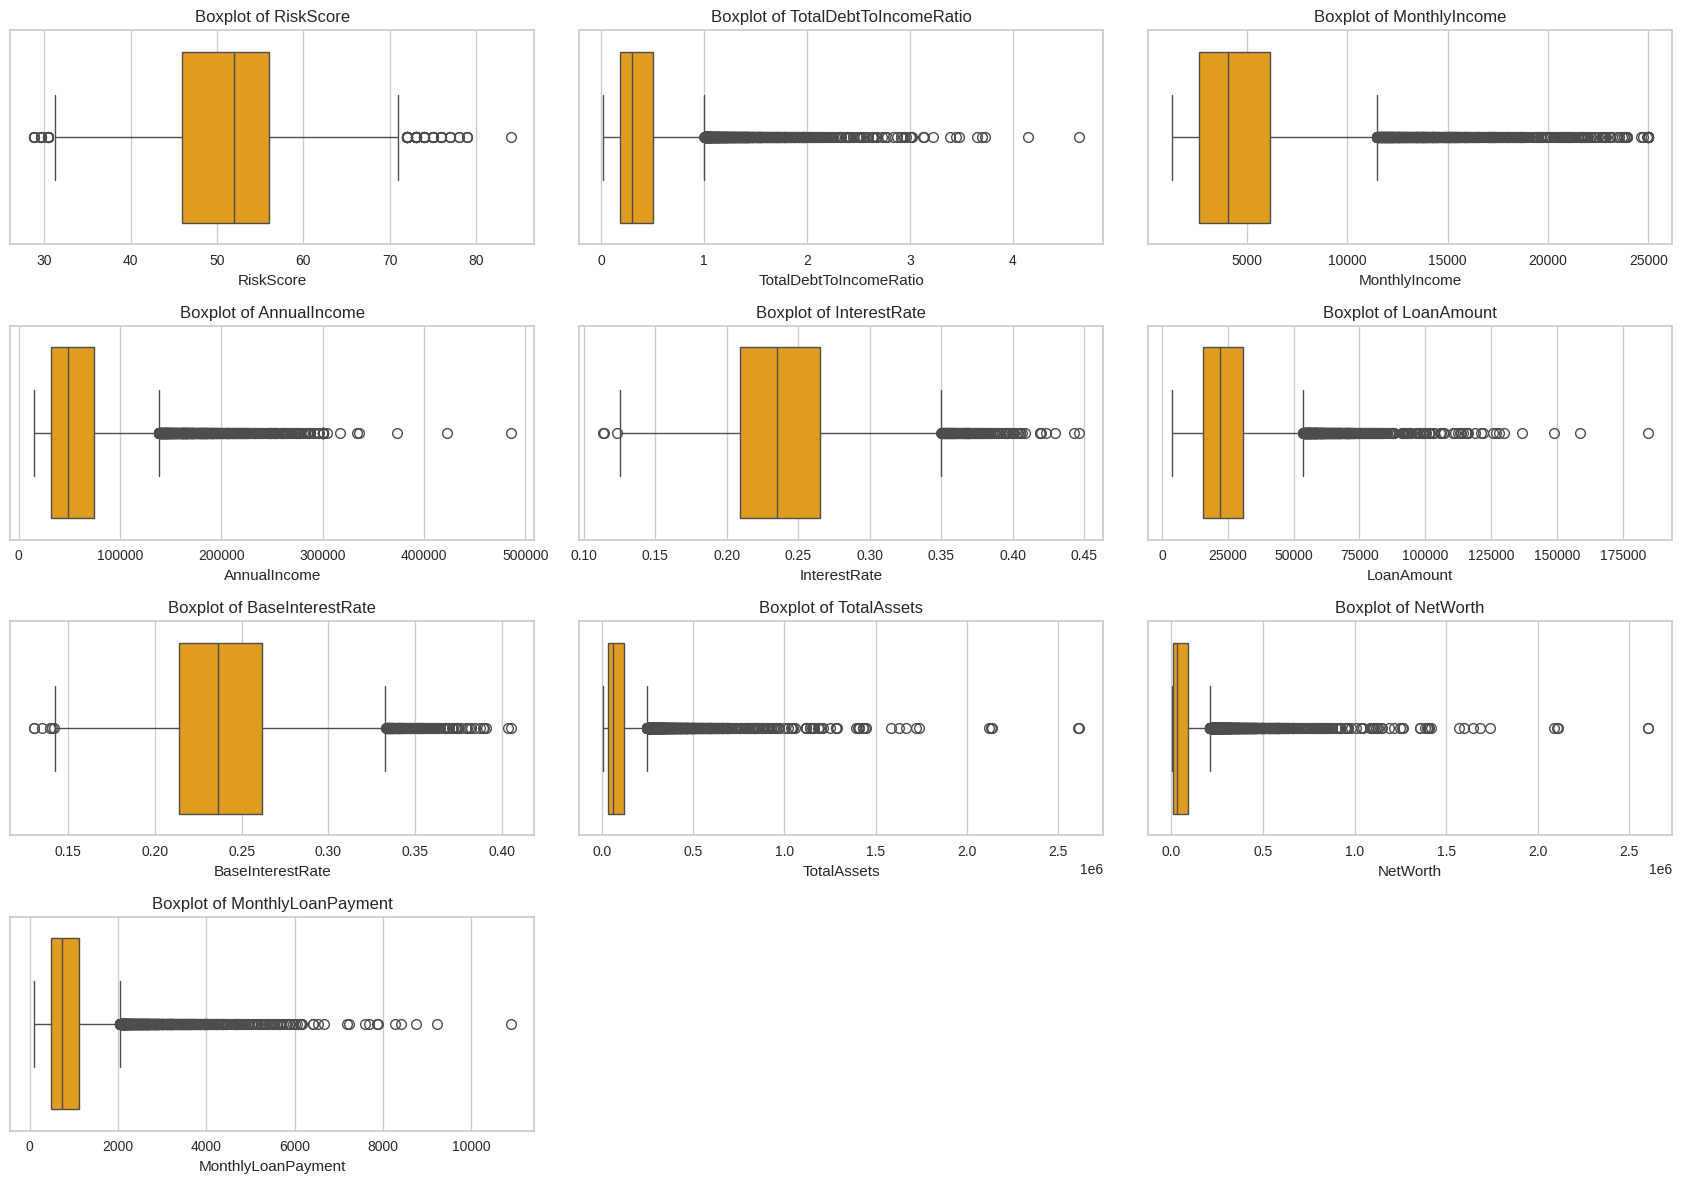

In [ ]:
# 4. Boxplots to Identify Outliers
plt.figure(figsize=(17, 12))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[feature], color='orange')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

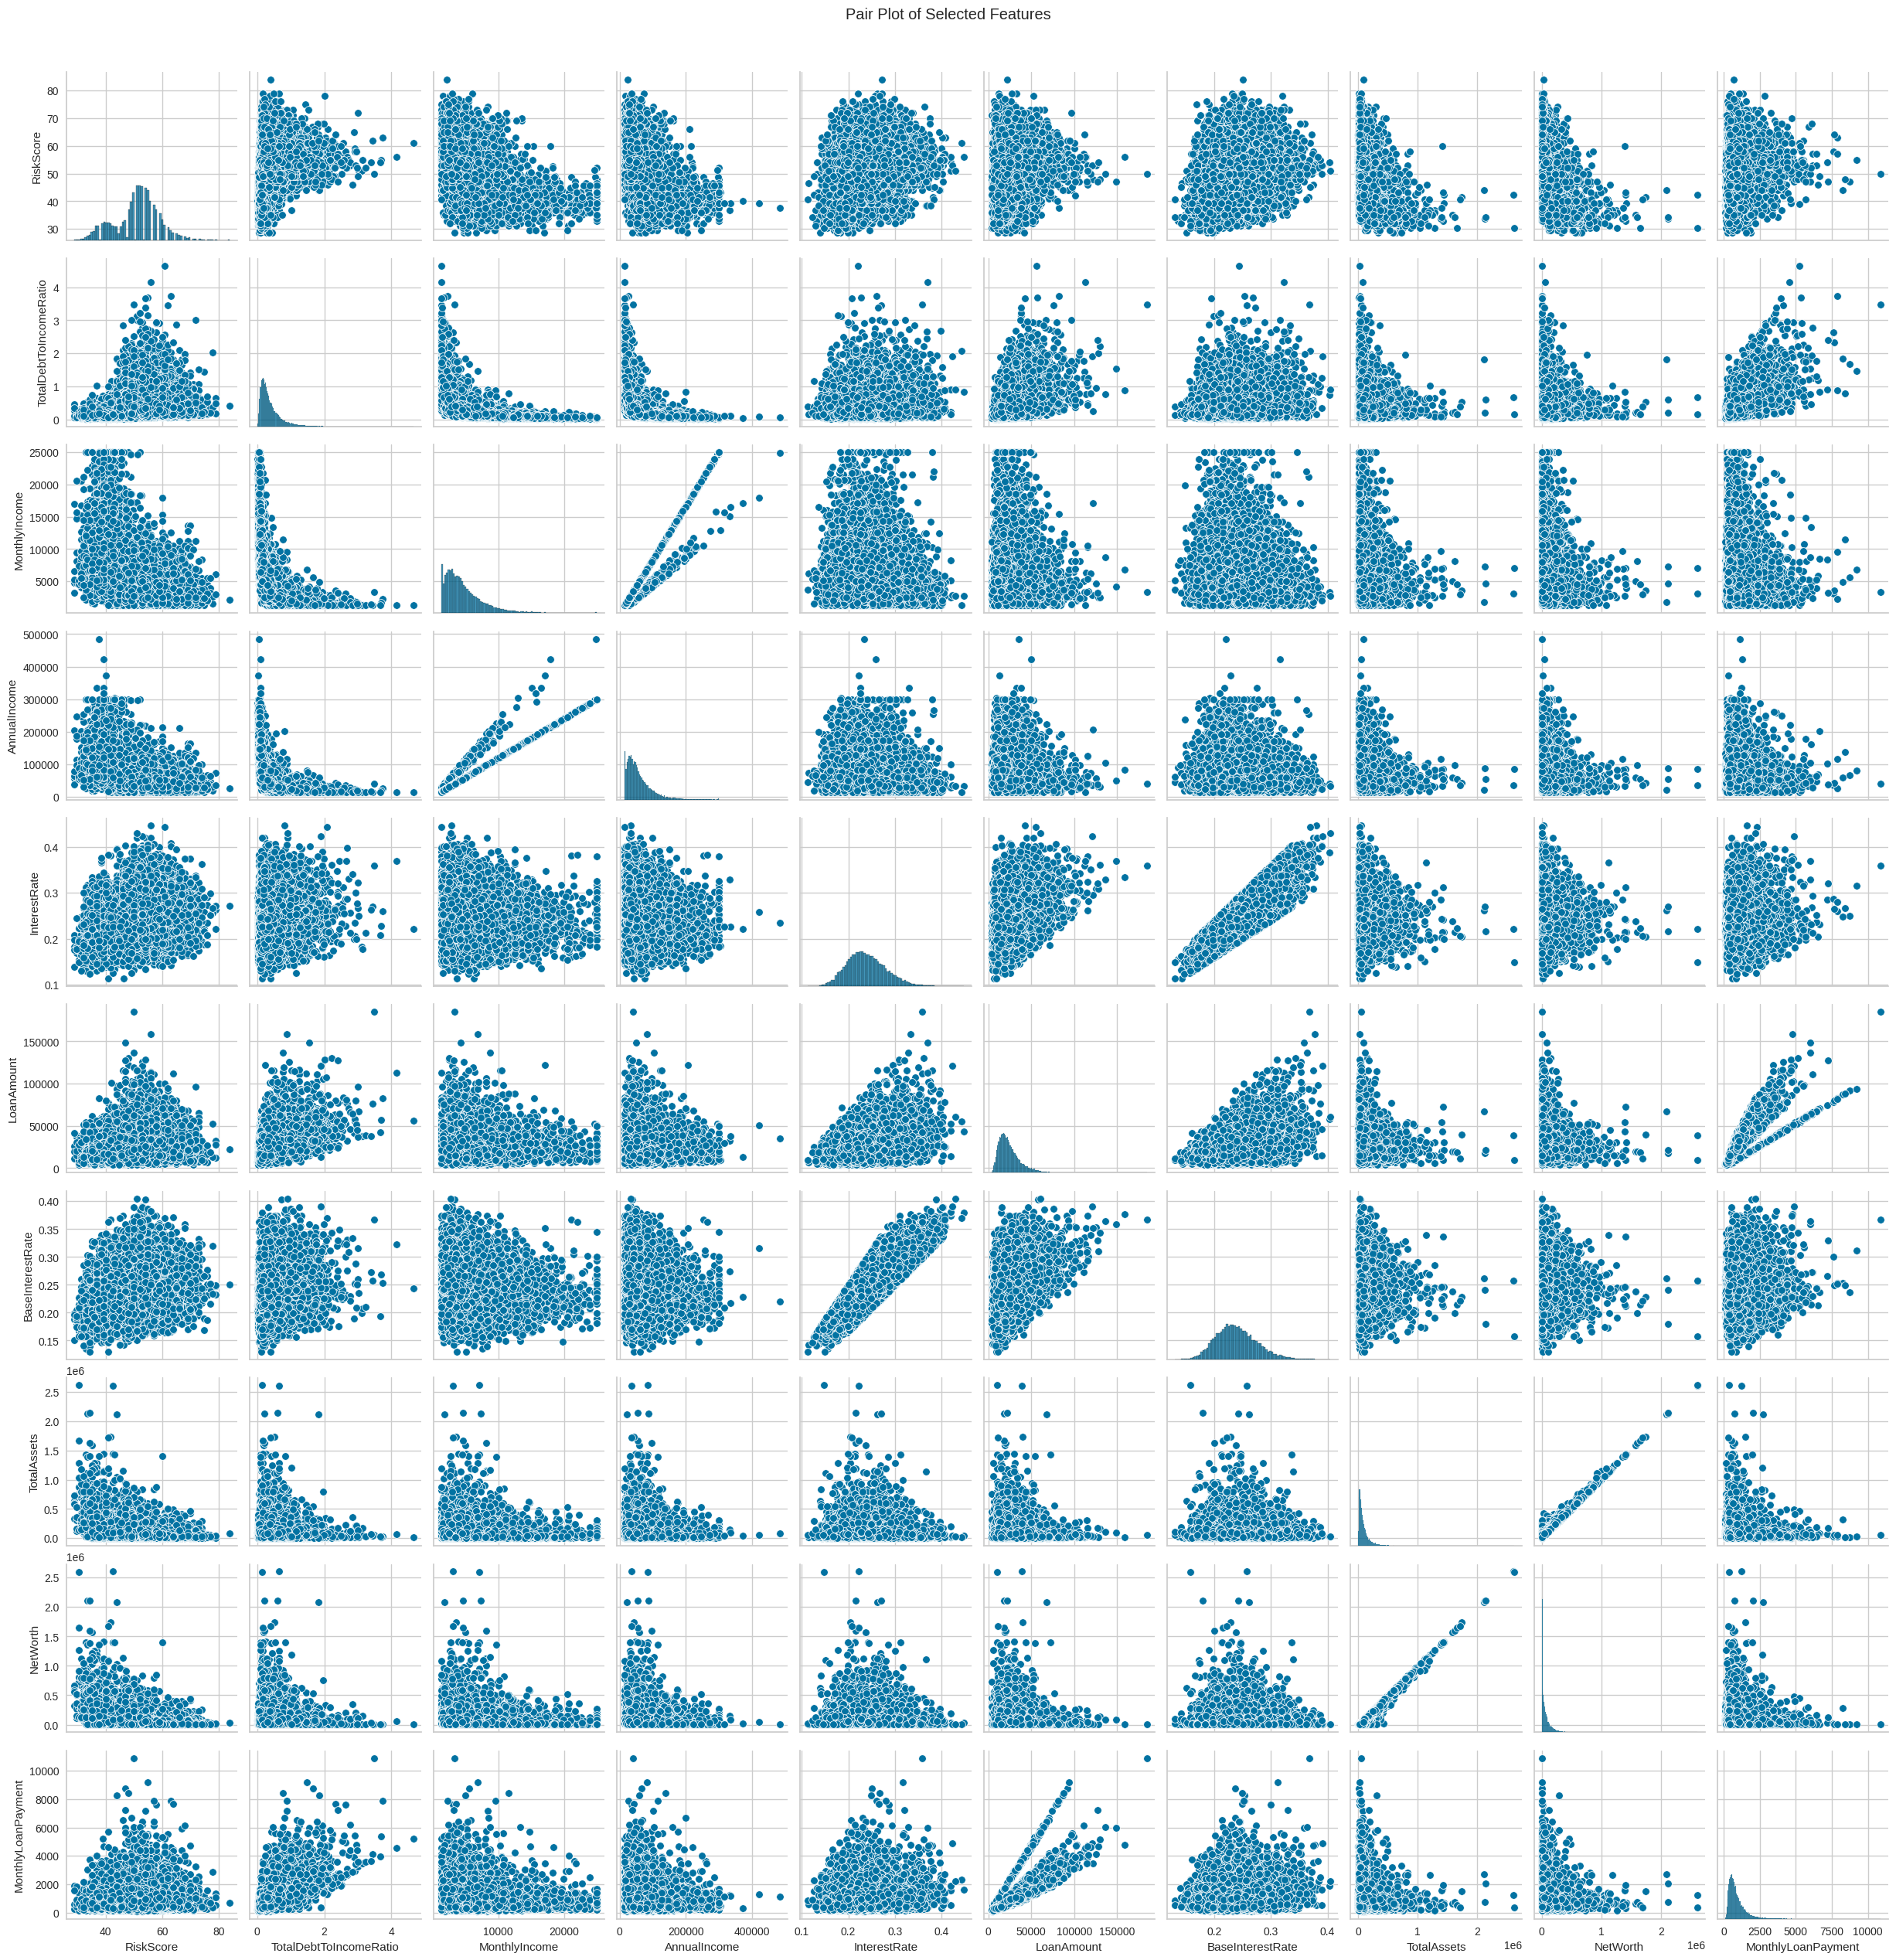

In [ ]:
# 5. Pair Plot for Relationships between Features
sns.pairplot(df[selected_features])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

<Axes: xlabel='AnnualIncome', ylabel='Count'>

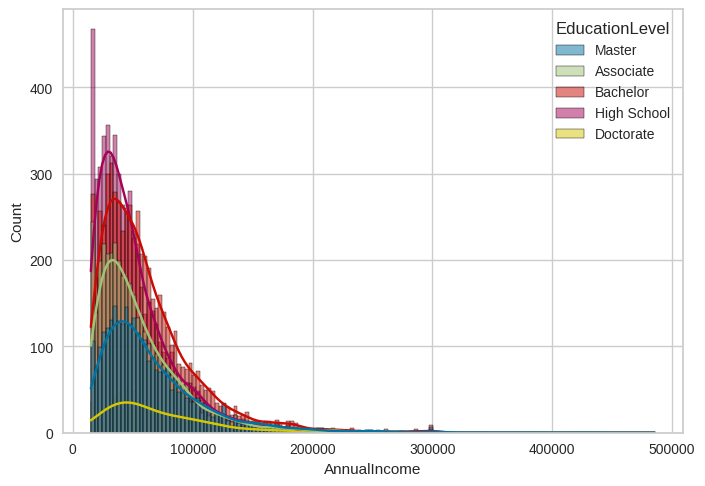

In [ ]:
sns.histplot(df, x = 'AnnualIncome', hue = 'EducationLevel', kde= True)

The chart shows that higher education levels are generally associated with higher incomes, **with Doctorate and Master's degree holders having the potential to earn more**, though they represent fewer individuals.

High School and Associate degree holders cluster around **lower income brackets, while Bachelor’s degree holders form a middle-income group**. This visualization can help showcase the influence of education on earning potential.

In [ ]:
#  we select the variables to analyze
x = ['RiskScore', 'TotalDebtToIncomeRatio', 'MonthlyIncome', 'AnnualIncome',
                     'InterestRate', 'LoanAmount', 'BaseInterestRate', 'TotalAssets',
                     'NetWorth', 'MonthlyLoanPayment']

df[x].describe()

,RiskScore,TotalDebtToIncomeRatio,MonthlyIncome,AnnualIncome,InterestRate,LoanAmount,BaseInterestRate,TotalAssets,NetWorth,MonthlyLoanPayment
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000
mean,50.766780,0.402182,4891.715521,59161.473550,0.239110,24882.867800,0.239124,9.696440e+04,7.229432e+04,911.607052
std,7.778262,0.338924,3296.771598,40350.845168,0.042205,13427.421217,0.035509,1.207999e+05,1.179200e+05,674.583473
min,28.800000,0.016043,1250.000000,15000.000000,0.113310,3674.000000,0.130101,2.098000e+03,1.000000e+03,97.030193
25%,46.000000,0.179693,2629.583333,31679.000000,0.209142,15575.000000,0.213889,3.118025e+04,8.734750e+03,493.763700
50%,52.000000,0.302711,4034.750000,48566.000000,0.235390,21914.500000,0.236157,6.069900e+04,3.285550e+04,728.511452
75%,56.000000,0.509214,6163.000000,74391.000000,0.265532,30835.000000,0.261533,1.174052e+05,8.882550e+04,1112.770759
max,84.000000,4.647657,25000.000000,485341.000000,0.446787,184732.000000,0.405029,2.619627e+06,2.603208e+06,10892.629520


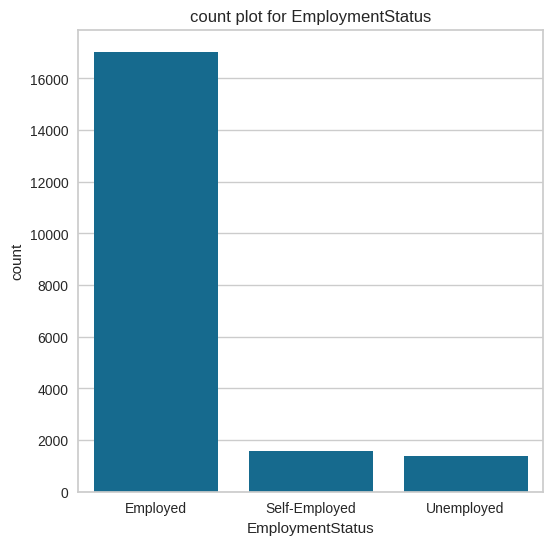

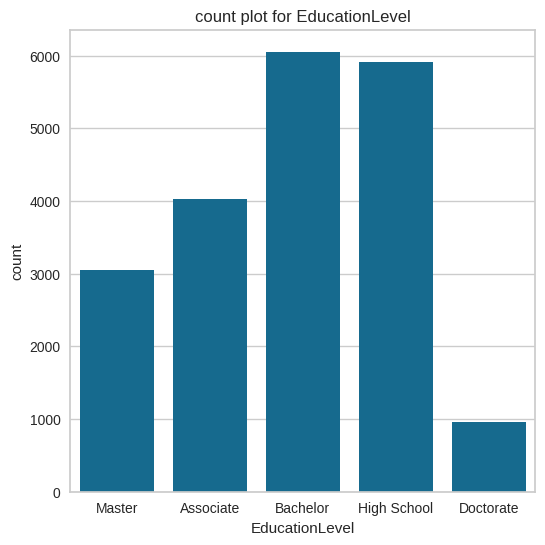

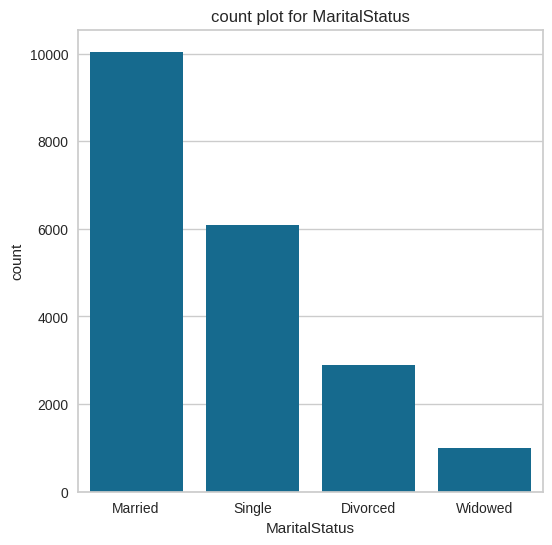

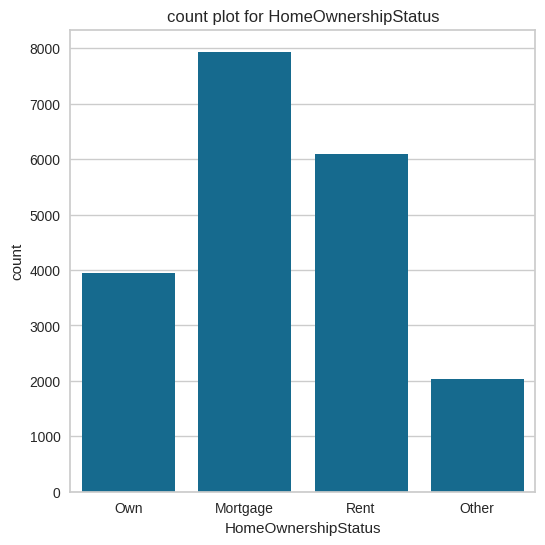

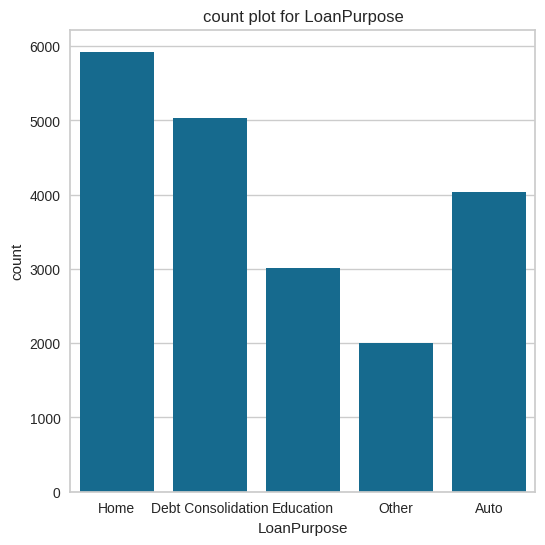

In [ ]:
for cols in df.select_dtypes('object').columns :
    plt.figure(figsize=(6,6))
    sns.countplot(data=df, x=cols )
    plt.title(f"count plot for {cols}")
    plt.show()

In [ ]:
# Apply StandardScaler to Numerical Features
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

In [ ]:
#  Define the Target and Feature Set
X = df[selected_features]
y = df['LoanApproved']  # Assuming 'LoanApproved' is the target variable

In [ ]:
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Build the Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#  Model Predictions and Evaluation
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Model Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2983
           1       0.98      0.98      0.98      1017

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000


Confusion Matrix:
 [[2967   16]
 [  25  992]]


**Summary:**

The model shows excellent performance with **99% accuracy**, high precision, and recall for both approved and non-approved classes.

The false positive and false negative rates are very low (16 false positives and 25 false negatives), which is important for a balanced and reliable model in loan approval prediction.

The model slightly struggles more with classifying approved loans (class 1) compared to non-approved loans, but the difference is minimal.